### Streaming 

Methods : stream() and astream()
- these methods are sync and async methods for straming back results. 

Additional parameters in streaming modes for graph state. 

- **values** : this streams the full state of the graph after each node is called.
- **update** : this streams updates to the state of the graph after each node is called.

![](../images/img3.png)

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import START,END,StateGraph

## reducers 
from langgraph.graph.message import add_messages
from typing import Annotated 


In [2]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [7]:
import os 
from dotenv import load_dotenv 
from rich import print
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API")


In [5]:
llm=ChatGroq(model="openai/gpt-oss-120b")

In [9]:
print(llm.invoke("hi my name is abhi , how can you help me ").content)

Hey Abhi! 👋 Nice to meet you.

I’m here to help with a wide range of things, such as:

- **Answering questions** – from science, history, tech, pop culture, and more.
- **Explaining concepts** – break down complex ideas into easy‑to‑understand explanations.
- **Writing assistance** – drafts, edits, brainstorming, creative stories, emails, resumes, etc.
- **Learning & tutoring** – step‑by‑step problem solving, language practice, study tips.
- **Programming help** – code snippets, debugging, algorithm explanations, best practices.
- **Planning & organization** – to‑do lists, schedules, project outlines, travel itineraries.
- **Fun & creativity** – jokes, riddles, puzzles, role‑playing scenarios, brainstorming ideas.

Just let me know what you’re looking for or what you’d like to work on, and we’ll dive right in! 🚀

#### We will start with creating nodes 

In [10]:
from langgraph.checkpoint.memory import MemorySaver 
memory=MemorySaver()

def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

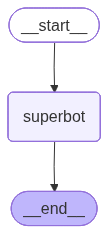

In [15]:
builder=StateGraph(State)

## adding nodes 

builder.add_node("superbot",superbot)


## adding edges 

builder.add_edge(START,"superbot")
builder.add_edge("superbot",END)


## lets build a graph 

graph=builder.compile(checkpointer=memory)
# graph=builder.compile()

from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
## invocation

config={"configurable":{"thread_id":"1"}}

print(graph.invoke({'messages':"hi, my name is abhijit and i like to play cricket."},config=config))

{
    'messages': [
        HumanMessage(
            content='hi, my name is abhijit and i like to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='0094031e-f4d1-4473-bc32-24525144fc87'
        ),
        AIMessage(
            content="Hey Abhijit! Great to meet you. Cricket is such an exciting sport—whether you’re batting, 
bowling, or just cheering from the stands, there’s always something thrilling happening. Do you have a favorite 
team or player? Or maybe you enjoy playing a particular role on the field? I'd love to hear more!",
            additional_kwargs={
                'reasoning_content': 'The user says hi, introduces themselves. We respond friendly. No disallowed 
content.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 93,
                    'prompt_tokens': 86,
                    'total_tokens': 179,
                    'completion_time': 0.184845217,
                    'prompt_time': 0.003091451,
                    'queue_time': 0.043731159,
                    'total_time': 0.187936668
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_3a688838c3',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--e80554d1-4c10-4f46-99e3-15e977e4bf37-0',
            usage_metadata={'input_tokens': 86, 'output_tokens': 93, 'total_tokens': 179}
        ),
        HumanMessage(
            content='hi, my name is abhijit and i like to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='d676ab1a-effc-455c-8f14-3031dd106558'
        ),
        AIMessage(
            content="Hey Abhijit! Nice to meet you. 🎉  \n\nCricket is such a fun game—whether you’re out on the 
pitch or cheering from the stands. Do you have a favorite format (Test, ODI, T20) or a team you root for? And what 
role do you enjoy most when you play—batting, bowling, fielding, or maybe keeping wickets? I'd love to hear more 
about your cricket adventures!",
            additional_kwargs={
                'reasoning_content': 'The user repeated greeting. We should respond politely, continue 
conversation, maybe ask about cricket preferences. No disallowed content.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 124,
                    'prompt_tokens': 177,
                    'total_tokens': 301,
                    'completion_time': 0.256893027,
                    'prompt_time': 0.00662896,
                    'queue_time': 0.043076589,
                    'total_time': 0.263521987
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_ed9190d8b7',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--1aaf8ebc-4009-4dbe-99fc-92f4ba575fc0-0',
            usage_metadata={'input_tokens': 177, 'output_tokens': 124, 'total_tokens': 301}
        )
    ]
}

#### Streaming the responses with Stream Method.